In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} B'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} B'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
sample_feature = reduce_mem_usage(pd.read_csv('./data_for_tree.csv'))
sample_feature.head(100)

Memory usage of dataframe is 62099672.00 B
Memory usage after optimization is: 16520331.00 B
Decreased by 73.4%


,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,4384.0,1.0,10192.0,35990.0,1800.0,13.0,36457520.0,4564.0,3576.0,5.0
1,1,2262,40.0,1,2.0,0.0,0.0,0,15.0,-,...,4756.0,4.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,NaN
2,2,14874,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,4384.0,2.0,1458.0,45000.0,8496.0,100.0,14373814.0,5424.0,9848.0,16.0
3,3,71865,109.0,10,0.0,0.0,1.0,193,15.0,0.0,...,7124.0,NaN,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,19.0
4,4,111080,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,1531.0,6.0,4664.0,31500.0,2300.0,20.0,15414322.0,3344.0,3306.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,159109,4.0,4,0.0,0.0,1.0,150,12.5,0.0,...,4030.0,NaN,16576.0,99999.0,6000.0,12.0,138279072.0,8088.0,8344.0,14.0
96,97,129992,11.0,10,0.0,0.0,1.0,125,10.0,0.0,...,4908.0,NaN,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,12.0
97,98,31752,1.0,1,2.0,NaN,1.0,0,15.0,0.0,...,NaN,6.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,NaN
98,99,102460,17.0,10,2.0,0.0,1.0,136,15.0,0.0,...,8044.0,7.0,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,13.0


In [5]:
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price','brand','model']]
continuous_feature_names

['SaleID',
 'name',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'seller',
 'offerType',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'train',
 'used_time',
 'city',
 'brand_amount',
 'brand_price_max',
 'brand_price_median',
 'brand_price_min',
 'brand_price_sum',
 'brand_price_std',
 'brand_price_average',
 'power_bin']

##  线性回归 & 五折交叉验证 & 模拟真实业务情况

In [105]:
sample_feature = sample_feature.dropna().replace('-', 0).reset_index(drop=True)
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)
train = sample_feature[continuous_feature_names + ['price']]

train_X = train[continuous_feature_names]
train_y = train['price']

## 1 简单建模

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
model = LinearRegression(normalize=True)

In [108]:
model = model.fit(train_X, train_y)

查看训练的线性回归模型的截距（intercept）与权重(coef)

In [109]:
'intercept:'+ str(model.intercept_)

sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

[('v_6', 3367064.3416418517),
 ('v_8', 700675.5609398601),
 ('v_9', 170630.27723220916),
 ('v_7', 32322.661932017618),
 ('v_12', 20473.670796992676),
 ('v_3', 17868.079541511983),
 ('v_11', 11474.938996733352),
 ('v_13', 11261.76456001996),
 ('v_10', 2683.9200905861935),
 ('gearbox', 881.8225039248066),
 ('fuelType', 363.90425072160497),
 ('bodyType', 189.60271012071303),
 ('city', 44.94975120522546),
 ('power', 28.553901616752746),
 ('brand_price_median', 0.5103728134078933),
 ('brand_price_std', 0.45036347092633666),
 ('brand_amount', 0.1488112039506541),
 ('brand_price_max', 0.003191018670312297),
 ('SaleID', 5.355989919860597e-05),
 ('seller', 1.1693628039211035e-06),
 ('train', 1.4156103134155273e-07),
 ('offerType', -1.7627025954425335e-06),
 ('brand_price_sum', -2.175006868187533e-05),
 ('name', -0.0002980012713108422),
 ('used_time', -0.002515894332864041),
 ('brand_price_average', -0.40490484510117003),
 ('brand_price_min', -2.2467753486897615),
 ('power_bin', -34.420644117282

In [110]:
from matplotlib import pyplot as plt

In [111]:
subsample_index = np.random.randint(low=0, high=len(train_y), size=50)
subsample_index

array([20890, 83947, 19120, 57633, 63234, 46896, 35223, 28014, 55794,
       31607, 70173, 39643, 81492, 63681, 70153, 22641, 33578, 78903,
       38585, 28687, 20383, 90648, 88026, 63208, 13197, 22578, 66805,
       75269, 74891,  3012, 12073, 63129, 39953, 11084, 39459, 77998,
       70039, 41962, 10930, 27286, 55430, 12238, 81185, 31196, 36506,
       77056, 30234, 82443, 51437, 74210])

绘制特征v_9的值与标签的散点图，图片发现模型的预测结果（蓝色点）与真实标签（黑色点）的分布差异较大，且部分预测值出现了小于0的情况，说明我们的模型存在一些问题

The predicted price is obvious different from true price


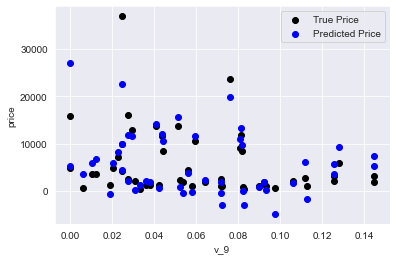

In [112]:
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], model.predict(train_X.loc[subsample_index]), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price is obvious different from true price')
plt.show()

通过作图我们发现数据的标签（price）呈现长尾分布，不利于我们的建模预测。原因是很多模型都假设数据误差项符合正态分布，而长尾分布的数据违背了这一假设。

It is clear to see the price shows a typical exponential distribution


<AxesSubplot:xlabel='price', ylabel='Density'>

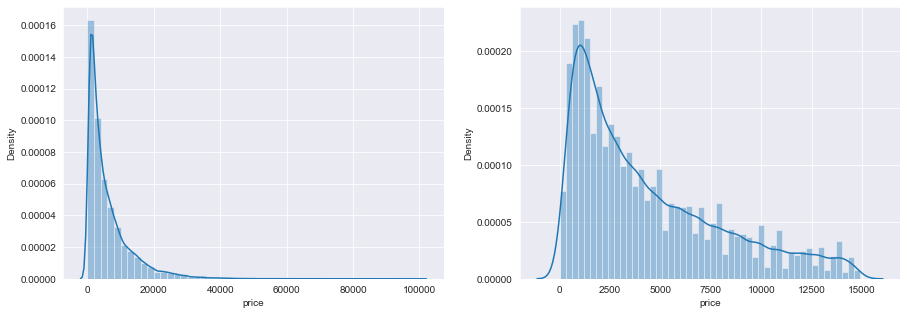

In [113]:
import seaborn as sns
print('It is clear to see the price shows a typical exponential distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y)
plt.subplot(1,2,2)
sns.distplot(train_y[train_y < np.quantile(train_y, 0.9)])

##### 对标签进行了  log(x+1)变换，使标签贴近于正态分布

In [114]:
train_y_ln = np.log(train_y + 1)

The transformed price seems like normal distribution


<AxesSubplot:xlabel='price', ylabel='Density'>

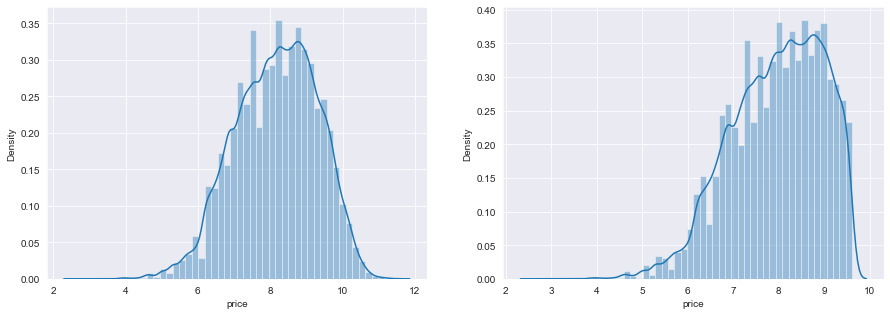

In [115]:
import seaborn as sns
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln, 0.9)])

再次进行可视化，发现预测结果与真实值较为接近，且未出现异常状况

In [116]:
model = model.fit(train_X, train_y_ln)

print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:18.750748443060576


[('v_9', 8.052410408820782),
 ('v_5', 5.7642407803967455),
 ('v_12', 1.6182060982411401),
 ('v_1', 1.479831064542148),
 ('v_11', 1.1669004173609911),
 ('v_13', 0.9404706327191015),
 ('v_7', 0.7137281645203212),
 ('v_3', 0.6837863827342633),
 ('v_0', 0.008500505209783063),
 ('power_bin', 0.008497968353526683),
 ('gearbox', 0.007922378343287479),
 ('fuelType', 0.006684768936308926),
 ('bodyType', 0.004523520651792115),
 ('power', 0.0007161895389362842),
 ('brand_price_min', 3.334354528990976e-05),
 ('brand_amount', 2.8978802894926596e-06),
 ('brand_price_median', 1.257118777102827e-06),
 ('brand_price_std', 6.659170007153928e-07),
 ('brand_price_max', 6.194957302458369e-07),
 ('brand_price_average', 5.999348706717425e-07),
 ('SaleID', 2.1194159119228813e-08),
 ('seller', 1.674571592502616e-11),
 ('offerType', 1.0393463867330865e-11),
 ('train', 6.195932655828074e-12),
 ('brand_price_sum', -1.512651424568793e-10),
 ('name', -7.015511195835198e-08),
 ('used_time', -4.12247701627119e-06),
 

The predicted price seems normal after np.log transforming


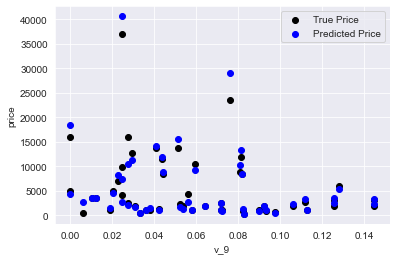

In [117]:
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], np.exp(model.predict(train_X.loc[subsample_index])), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()

## 2 五折交叉验证

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer

In [119]:
def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

使用线性回归模型，对未处理标签的特征数据进行五折交叉验证（Error 1.36）

In [120]:
scores = cross_val_score(model, X=train_X, y=train_y, verbose=1, cv = 5, scoring=make_scorer(log_transfer(mean_absolute_error)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [121]:
print('AVG:', np.mean(scores))

AVG: 1.3658024027749325


使用线性回归模型，对处理过标签的特征数据进行五折交叉验证（Error 0.19）

In [122]:
scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=1, cv = 5, scoring=make_scorer(mean_absolute_error))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [123]:
print('AVG:', np.mean(scores))

AVG: 0.19325301753940494


In [124]:
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1, 6)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.190792,0.193758,0.194132,0.191825,0.195758


In [125]:
# import datetime
# sample_feature = sample_feature.reset_index(drop=True)
# split_point = len(sample_feature) // 5 * 4

In [126]:
# train = sample_feature.loc[:split_point].dropna()
# val = sample_feature.loc[split_point:].dropna()

In [127]:
# train_X = train[continuous_feature_names]
# train_y_ln = np.log(train['price'] + 1)
# val_X = val[continuous_feature_names]
# val_y_ln = np.log(val['price'] + 1)

## 3 绘制学习率曲线与验证曲线

In [128]:
from sklearn.model_selection import learning_curve, validation_curve

In [129]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_size=np.linspace(.1, 1.0, 5 )):  
    plt.figure()  
    plt.title(title)  
    if ylim is not None:  
        plt.ylim(*ylim)  
    plt.xlabel('Training example')  
    plt.ylabel('score')  
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_size, scoring = make_scorer(mean_absolute_error))  
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)  
    test_scores_mean = np.mean(test_scores, axis=1)  
    test_scores_std = np.std(test_scores, axis=1)  
    plt.grid()#区域  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,  
                     train_scores_mean + train_scores_std, alpha=0.1,  
                     color="r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,  
                     test_scores_mean + test_scores_std, alpha=0.1,  
                     color="g")  
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',  
             label="Training score")  
    plt.plot(train_sizes, test_scores_mean,'o-',color="g",  
             label="Cross-validation score")  
    plt.legend(loc="best")  
    return plt  

<module 'matplotlib.pyplot' from 'D:\\Python\\lib\\site-packages\\matplotlib\\pyplot.py'>

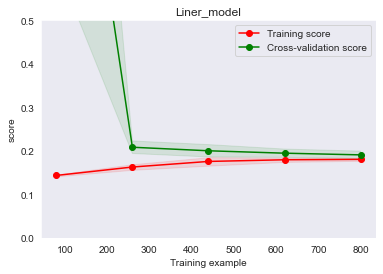

In [130]:
plot_learning_curve(LinearRegression(), 'Liner_model', train_X[:1000], train_y_ln[:1000], ylim=(0.0, 0.5), cv=5, n_jobs=1)  

In [131]:
train = sample_feature[continuous_feature_names + ['price']].dropna()

train_X = train[continuous_feature_names]
train_y = train['price']
train_y_ln = np.log(train_y + 1)

## 多种模型对比

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

###  1 线性模型 & 嵌入式特征选择

In [133]:
models = [LinearRegression(),
          Ridge(),
          Lasso()]

In [134]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
Ridge is finished
Lasso is finished


In [135]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.190792,0.194832,0.383899
cv2,0.193758,0.197632,0.381893
cv3,0.194132,0.198123,0.384090
cv4,0.191825,0.195670,0.380526
cv5,0.195758,0.199676,0.383611


intercept:18.750748443078322


<AxesSubplot:xlabel='Coefficient', ylabel='Feature'>

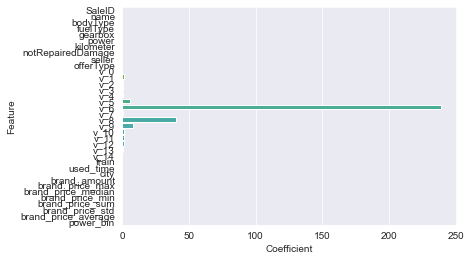

In [136]:
model = LinearRegression().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
# Create a DataFrame for plotting
data = pd.DataFrame({
    'Feature': continuous_feature_names,
    'Coefficient': abs(model.coef_)
})

# Plot using seaborn
sns.barplot(x='Coefficient', y='Feature', data=data)

L2正则化在拟合过程中通常都倾向于让权值尽可能小，最后构造一个所有参数都比较小的模型。因为一般认为参数值小的模型比较简单，能适应不同的数据集，也在一定程度上避免了过拟合现象。可以设想一下对于一个线性回归方程，若参数很大，那么只要数据偏移一点点，就会对结果造成很大的影响；但如果参数足够小，数据偏移得多一点也不会对结果造成什么影响，专业一点的说法是『抗扰动能力强』

intercept:4.671710763567269


<AxesSubplot:xlabel='Coefficient', ylabel='Feature'>

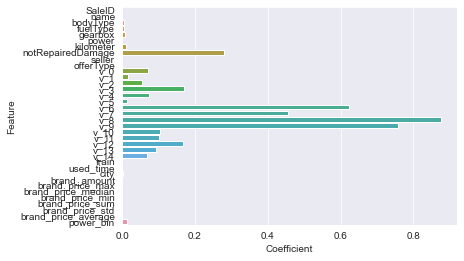

In [137]:
model = Ridge().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
data = pd.DataFrame({
    'Feature': continuous_feature_names,
    'Coefficient': abs(model.coef_)
})

# Plot using seaborn
sns.barplot(x='Coefficient', y='Feature', data=data)

L1正则化有助于生成一个稀疏权值矩阵，进而可以用于特征选择。如下图，我们发现power与userd_time特征非常重要

intercept:8.672182470075398


<AxesSubplot:xlabel='Coefficient', ylabel='Feature'>

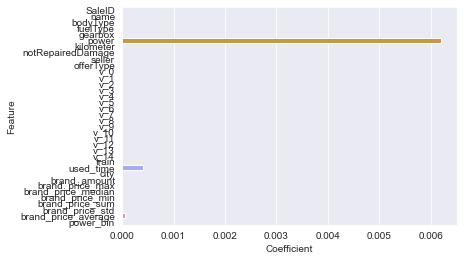

In [138]:
model = Lasso().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
data = pd.DataFrame({
    'Feature': continuous_feature_names,
    'Coefficient': abs(model.coef_)
})

# Plot using seaborn
sns.barplot(x='Coefficient', y='Feature', data=data)

除此之外，决策树通过信息熵或GINI指数选择分裂节点时，优先选择的分裂特征也更加重要，这同样是一种特征选择的方法。XGBoost与LightGBM模型中的model_importance指标正是基于此计算的

###  2 非线性模型
除了线性模型以外，还有许多我们常用的非线性模型如下。

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [140]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor(solver='lbfgs', max_iter=100), 
          XGBRegressor(n_estimators = 100, objective='reg:squarederror'), 
          LGBMRegressor(n_estimators = 100)]

In [141]:
result = dict()
from time import time
for model in models:
    start = time()
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    end = time()
    elapsed = end - start
    print('{0} is finished; used {1:5f} seconds'.format(model_name, elapsed))

LinearRegression is finished; used 0.525997 seconds
DecisionTreeRegressor is finished; used 10.117358 seconds
RandomForestRegressor is finished; used 602.298543 seconds
GradientBoostingRegressor is finished; used 168.287223 seconds
MLPRegressor is finished; used 90.264755 seconds
XGBRegressor is finished; used 3.917295 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5094
[LightGBM] [Info] Number of data points in the train set: 73383, number of used features: 33
[LightGBM] [Info] Start training from score 8.164231
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5090
[LightGBM] [Info] Number of data points in the train set: 73383, number of used features: 33
[LightGBM] [Info] Start training from sc

In [142]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,LGBMRegressor
cv1,0.190792,0.197427,0.132812,0.168897,1711.598413,0.137922,0.141544
cv2,0.193758,0.192250,0.134405,0.171850,224.038368,0.138979,0.145501
cv3,0.194132,0.190136,0.133727,0.170906,928.775996,0.138711,0.143887
cv4,0.191825,0.190088,0.132605,0.169083,287.403374,0.137012,0.142497
cv5,0.195758,0.204664,0.137078,0.174088,541.172120,0.140362,0.144852


2030